## Data Loading and Inital Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

ModuleNotFoundError: No module named 'seaborn'

### Data inital prep functions

In [3]:
def load_data(filepath):
    """
    Load data from a specified CSV file and convert the 'date' column to datetime format.

    Args:
        filepath (str): The path to the CSV file to be loaded.

    Returns:
        pd.DataFrame: A DataFrame with the 'date' column converted to datetime objects.
    """
    data = pd.read_csv(filepath)
    data['date'] = pd.to_datetime(data['date'])
    return data

def preprocess_data(df):
    """
    Preprocess the data by setting the display format for floating-point numbers.

    Args:
        df (pd.DataFrame): The DataFrame to be processed.
    """
    pd.options.display.float_format = '{:,.2f}'.format
    return df

def data_summary(df):
    """
    Generate a summary of the DataFrame including data types, missing values, unique values, 
    and descriptive statistics for numerical columns.

    Args:
        df (pd.DataFrame): The DataFrame for which the summary is to be generated.

    Returns:
        pd.DataFrame: A DataFrame containing the summary information including the data type of each column,
                      the number of missing values, the percentage of missing values, the number of unique values,
                      and the minimum, maximum, mean, and standard deviation for numerical columns.

    """
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing #'] = df.isnull().sum()
    summ['Missing %'] = (df.isnull().sum() / len(df)) * 100
    summ['Unique Values'] = df.nunique()
    
    desc = df.describe().transpose()
    summ = summ.join(desc[['min', 'max', 'mean', 'std']])
    
    return summ

### Data Visualization functions

In [4]:
def plot_histograms(df, columns, bins=50):
    """
    Plot histograms for specified columns in the DataFrame.

    Args:
        df (DataFrame): Pandas DataFrame containing the data.
        columns (list): List of column names to plot histograms for.
        bins (int): Number of bins to use for the histograms.

    Returns:
        None: Displays the histogram plots.
    """
    num_plots = len(columns)
    fig, axes = plt.subplots(nrows=(num_plots // 2 + num_plots % 2), ncols=2, figsize=(12, num_plots * 2))
    axes = axes.flatten()
    for idx, col in enumerate(columns):
        sns.histplot(df[col], bins=bins, ax=axes[idx], color=np.random.rand(3,))
        axes[idx].set_title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

def correlation_analysis(df):
    """
    Display a heatmap of the correlation matrix for the DataFrame.

    Args:
        df (DataFrame): Pandas DataFrame containing the data.

    Returns:
        None: Displays the heatmap of the correlation matrix.
    """
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

def plot_moving_averages(df, metrics, ma_days):
    """
    Plot moving averages for specified metrics over defined days.

    Args:
        df (DataFrame): Pandas DataFrame containing the data.
        metrics (list): List of metric columns to calculate moving averages for.
        ma_days (list): List of day intervals (integers) for calculating moving averages.

    Returns:
        None: Displays the plots of the metrics with their moving averages.
    """
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.flatten()
    for i, metric in enumerate(metrics):
        for ma in ma_days:
            df[f'MA for {ma} days {metric}'] = df[metric].rolling(window=ma).mean()
        df[[metric] + [f'MA for {ma} days {metric}' for ma in ma_days]].plot(ax=axes[i])
        axes[i].set_title(f'{metric.upper()} Moving Averages')
    plt.tight_layout()
    plt.show()

def plot_scatter(df, x, y, hue=None, add_line=False):
    """
    Plot a scatter plot for two variables and optionally add a regression line.

    Args:
        df (DataFrame): Pandas DataFrame containing the data.
        x (str): Column name for the x-axis.
        y (str): Column name for the y-axis.
        hue (str, optional): Column name to color data points by.
        add_line (bool, optional): Whether to add a regression line.

    Returns:
        None: Displays the scatter plot.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue)
    plt.title(f'Relationship between {x} and {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    
    if add_line:
        sns.regplot(data=df, x=x, y=y, scatter=False, color='red')
    
    plt.show()

def plot_boxplots(df, columns):
    num_plots = len(columns)
    fig, axes = plt.subplots(nrows=(num_plots // 2 + num_plots % 2), ncols=2, figsize=(12, num_plots * 2))
    axes = axes.flatten()
    for idx, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[idx])
        axes[idx].set_title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

def plot_pairplot(df, hue=None):
    sns.pairplot(df, hue=hue)
    plt.suptitle('Pair Plot of DataFrame Variables', y=1.02)
    plt.show()



### Show implementation of the functions

In [5]:
data_df = load_data('/home/amy/work/RIT/TDess/DSCI-601-Amy/Data/Combined/combined_AAPL.csv')

In [6]:
data_df

,date,RET,VOL_CHANGE,BA_SPREAD,ILLIQUIDITY,sprtrn,TURNOVER,DJI_Return
0,1992-01-02,0.055432,0.717745,0.008403,4.510000e-10,0.000408,17.419850,0.000000
1,1992-01-03,-0.008403,-0.172890,0.004237,-8.340000e-11,0.004985,14.408127,0.009173
2,1992-01-06,-0.016949,-0.399632,0.004310,-2.850000e-10,-0.003291,8.650181,-0.000437
3,1992-01-07,0.019397,0.237283,0.004228,2.590000e-10,-0.001340,10.702726,0.001469
4,1992-01-08,0.023256,0.645321,0.004132,1.840000e-10,0.001677,17.609419,-0.000281
...,...,...,...,...,...,...,...,...
7804,2022-12-23,-0.002798,-0.181476,0.000076,-3.330000e-13,0.005868,4.008909,0.005342
7805,2022-12-27,-0.013878,0.081093,0.000231,-1.550000e-12,-0.004050,4.334004,0.001133
7806,2022-12-28,-0.030685,0.238299,0.000079,-2.850000e-12,-0.012021,5.366792,-0.011006
7807,2022-12-29,0.028324,-0.115337,0.000231,2.890000e-12,0.017461,4.747802,0.010497


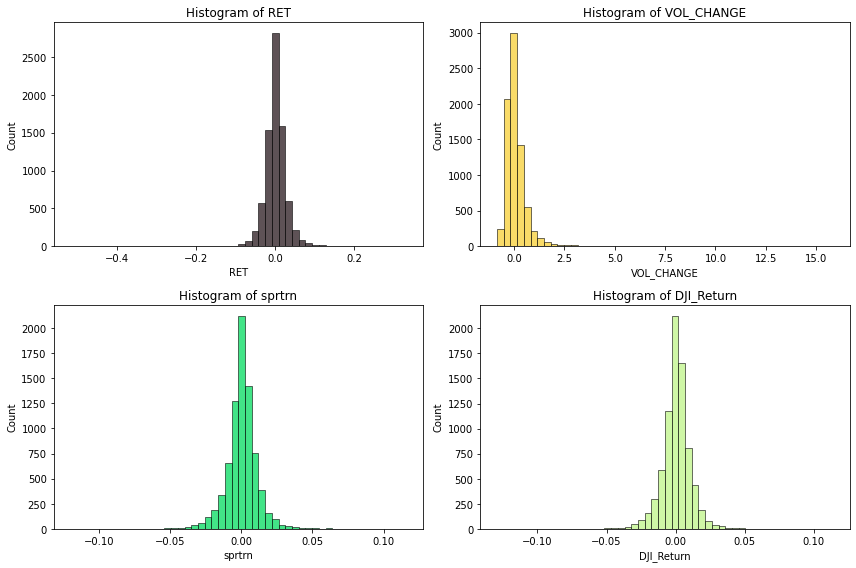

In [8]:
plot_histograms(data_df, ['RET', 'VOL_CHANGE', 'sprtrn','DJI_Return'])

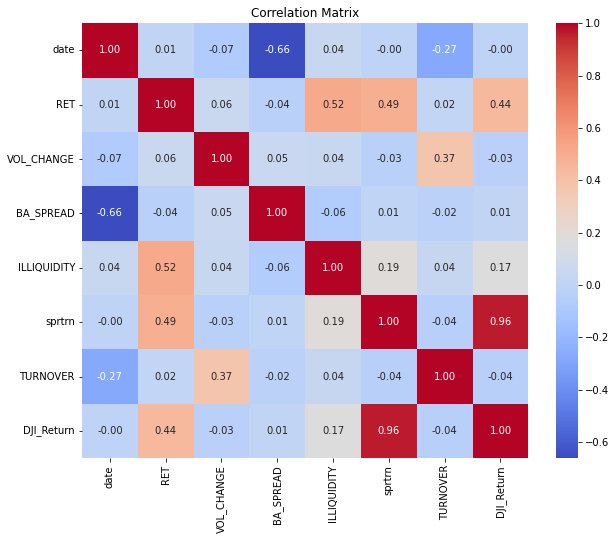

In [9]:
correlation_analysis(data_df)

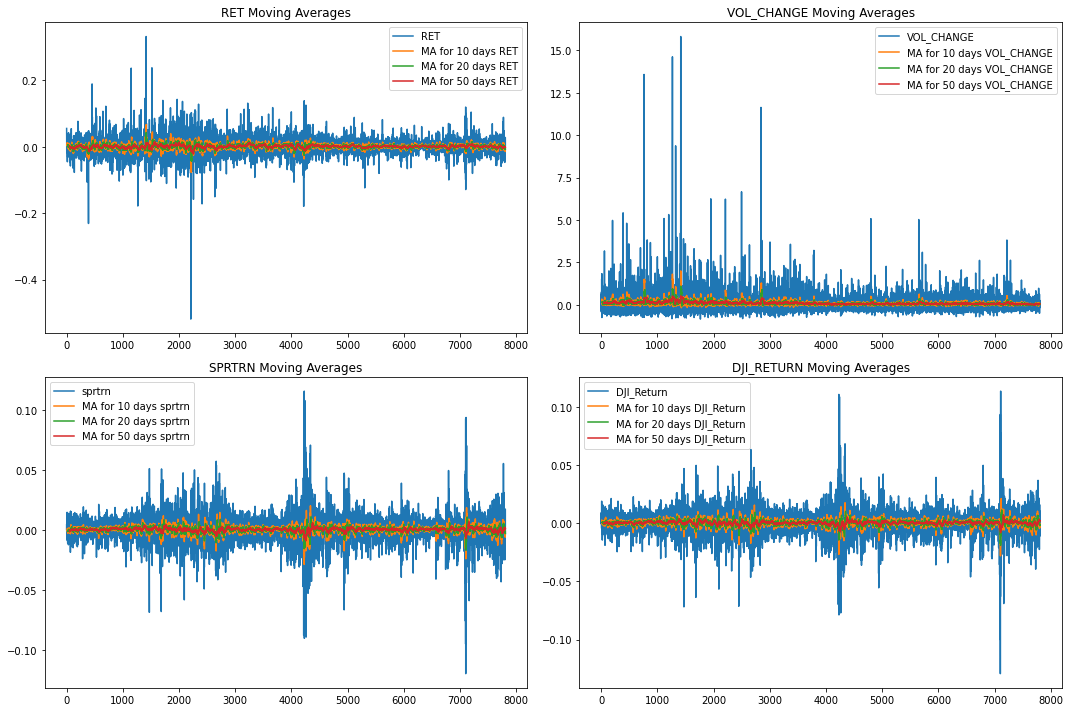

In [11]:
plot_moving_averages(data_df, ['RET', 'VOL_CHANGE', 'sprtrn','DJI_Return'], [10, 20, 50])

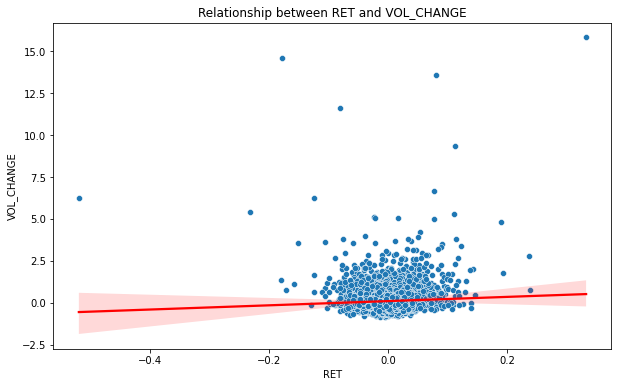

In [12]:
plot_scatter(data_df, 'RET', 'VOL_CHANGE', add_line=True)

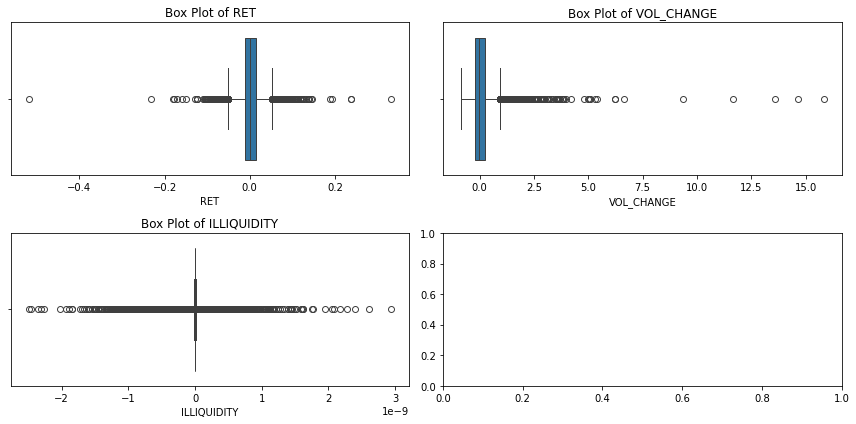

In [13]:
plot_boxplots(data_df, ['RET', 'VOL_CHANGE', 'ILLIQUIDITY'])

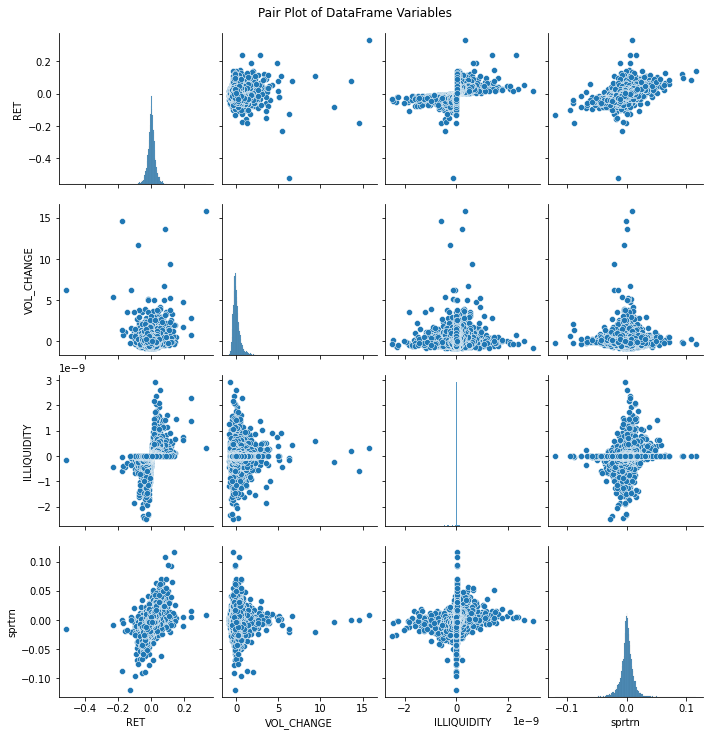

In [14]:
plot_pairplot(data_df[['RET', 'VOL_CHANGE', 'ILLIQUIDITY', 'sprtrn']])
